In [1]:
from __future__ import print_function

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from astropy import constants as const
from astropy import units

# for nicer looking plots. You can comment this if you don't have seaborn
import seaborn as sns; sns.set(context="poster")

/Users/egentry/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Activity Description
see: https://docs.google.com/document/d/1ALSBqY4wv7BfCtdi1uFhnFNNlMcIHSg1VooC6rgxvds/edit?usp=sharing

# Define and test functions

In [2]:
def equilibrium_temperature(luminosity, distance, albedo=0):
    """
    Calculates the equilibrium temperature of a planet, assuming blackbody radiation
    and thermodynamic equilibrium.
    
    Parameters
    ----------
    luminosity : float
        luminosity of the host star [ergs s**-1]
        
    distance : float
        distance between the star and the planet [cm]
        (assumes circular orbits)
    
    albedo : float
        albedo of the planet (0 for perfect absorber, 1 for perfect reflector)
        
    
    Returns
    -------
    T_eq : float
        Equilibrium temperature of the planet
    """
    
    T_eq = (luminosity / distance**2)**.25  \
            * ((1-albedo) / (16 * np.pi * const.sigma_sb.cgs.value))**.25
    return T_eq

### Test `equilibrium_temperature`:
(there are better ways to do testing using libraries like `pytest`, `nose` or `unittest`)

In [3]:
T_eq_earth = equilibrium_temperature(const.L_sun.cgs.value, units.AU.to(units.cm))
print("Earth equilibrium temperature: ", T_eq_earth, " K")

Earth equilibrium temperature:  278.6565418182094  K


### Mass-luminosity relation

In [4]:
def luminosity_from_mass(mass):
    """
    Convert mass to luminosity using a standard mass-luminosity relation
    
    Parameters
    ----------
    mass : float
        stellar mass [g]
        
    Returns
    -------
    luminosity : float
        stellar luminosity [ergs s**-1]
        
    Notes
    -----
    not vectorized.
        `mass` cannot be an array
    
    
    Sources
    -------
    Maurizio & Cassisi (2005) Evolution of stars and stellar populations
        http://books.google.com/books?id=r1dNzr8viRYC&lpg=PA138&dq=Mass-Luminosity%20relation&lr=&client=firefox-a&pg=PA138#v=onepage&q=&f=false
    
    Nebojsa (2004) Advanced astrophysics
        http://books.google.com/books?id=-ljdYMmI0EIC&lpg=PA19&ots=VdMUIiCdP_&dq=Mass-luminosity%20relation&pg=PA19#v=onepage&q=&f=false
        
    """
    # convert to solar units
    mass /= const.M_sun.cgs.value
    
    if mass < .43:
        luminosity = .23 * (mass)**2.3
    elif mass < 2:
        luminosity = (mass)**4
    elif mass < 20:
        luminosity = 1.5 * (mass)**3.5
    else:
        luminosity = 3200
        
    # convert back into cgs units
    luminosity *= const.L_sun.cgs.value
    
    return luminosity
    


### test `luminosity_from_mass`:

In [5]:
if np.isclose(luminosity_from_mass(const.M_sun.cgs.value) / const.L_sun.cgs.value, 1 ):
    print("OK")
else:
    print("Error: luminosity_from_mass gave wrong answer")

OK


### Equilibrium temperature as a function of mass


In [6]:
def equilibrium_temperature_from_mass(mass, distance, albedo=0):
    return equilibrium_temperature(luminosity_from_mass(mass),
                                   distance,
                                   albedo = albedo)

### test `equilibrium_temperature_from_mass`

In [7]:
if np.isclose(equilibrium_temperature_from_mass(const.M_sun.cgs.value, units.AU.to(units.cm)),
           equilibrium_temperature(const.L_sun.cgs.value, units.AU.to(units.cm))):
    print("OK")
else:
    print("Error: equilibrium_temperature_from_mass gave wrong answer")

OK


# Results for activities

In [8]:
print("albedo = 0")
T_eq_earth = equilibrium_temperature(const.L_sun.cgs.value, units.AU.to(units.cm))
print("Earth equilibrium temperature: ", T_eq_earth, " K")
print()

Earth_albedo = .3
print("albedo = ", Earth_albedo)
T_eq_earth = equilibrium_temperature(const.L_sun.cgs.value,
                                     units.AU.to(units.cm),
                                     albedo=Earth_albedo)
print("Earth equilibrium temperature: ", T_eq_earth, " K")

albedo = 0
Earth equilibrium temperature:  278.6565418182094  K

albedo =  0.3
Earth equilibrium temperature:  254.88469198174965  K


In [9]:
mass = .96 * const.M_sun.cgs.value
luminosity = luminosity_from_mass(mass)
T_eq_earth = equilibrium_temperature(luminosity, units.AU.to(units.cm))

print("Earth equilibrium temperature from lower mass sun: ", T_eq_earth)

print("For a 10 K change in T_eq, the sun would need to be ", 
      round(100*(mass / const.M_sun.cgs.value)),
      "% of its current mass")

Earth equilibrium temperature from lower mass sun:  267.510280145481
For a 10 K change in T_eq, the sun would need to be  96 % of its current mass


### Get equilibrium temperatures of all the planets

In [10]:
# the better way to do this is with objects,
# but we're not going to teach object-oriented programming in this workshop

# tuples should be ("name", distance [in cm])
planets = [
    ("Mercury", 5.79e12),
    ("Venus",   1.08e13),
    ("Earth", 1.50e13),
    ("Mars", 2.28e13),
    ("Jupiter", 7.78e13),
    ("Saturn", 1.43e14),
    ("Uranus", 2.87e14),
    ("Neptune", 4.50e14),
    ("Pluto", 5.90e14)
]

solar_system_T_eqs = dict()
for planet in planets:
    solar_system_T_eqs[planet[0]] = equilibrium_temperature(const.L_sun.cgs.value,
                                                            planet[1])

In [11]:
solar_system_T_eqs

# if you wanted to keep the solar system in order, 
# you could have used collections.OrderedDict instead of dict

{'Earth': 278.2827712762738,
 'Jupiter': 122.19182482667804,
 'Mars': 225.71713316322044,
 'Mercury': 447.9119685588296,
 'Neptune': 50.80725039768863,
 'Pluto': 44.37168725926447,
 'Saturn': 90.12887089882359,
 'Uranus': 63.6196097526564,
 'Venus': 327.9593910947304}

# Calculate T_eq for all exoplanets

In [12]:
import exoplanets

In [13]:
exoplanets.download_data()
data = exoplanets.parse_data()

In [14]:
print("column names of `data`: ")
data.dtype.names

column names of `data`: 


('pl_hostname',
 'pl_letter',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'st_lum')

In [15]:
luminosities = const.L_sun.cgs.value * 10**data["st_lum"]
distances    = units.AU.to(units.cm) * data["pl_orbsmax"]

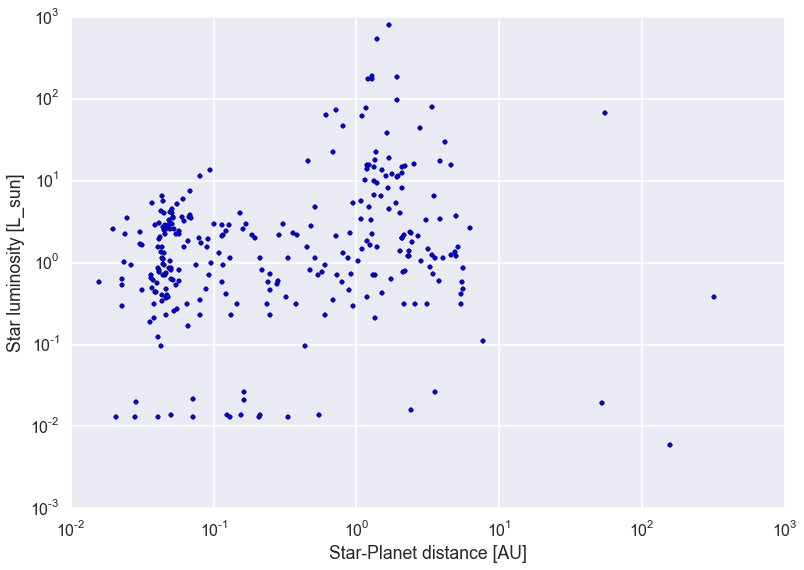

In [16]:
plt.scatter(distances / units.AU.to(units.cm), 
            luminosities / const.L_sun.cgs.value)
plt.xscale("log")
plt.yscale("log")
plt.ylim(10**-3, 10**3)

plt.xlabel("Star-Planet distance [AU]")
plt.ylabel("Star luminosity [L_sun]")

In [17]:
equilibrium_temperatures = equilibrium_temperature(luminosities, distances)

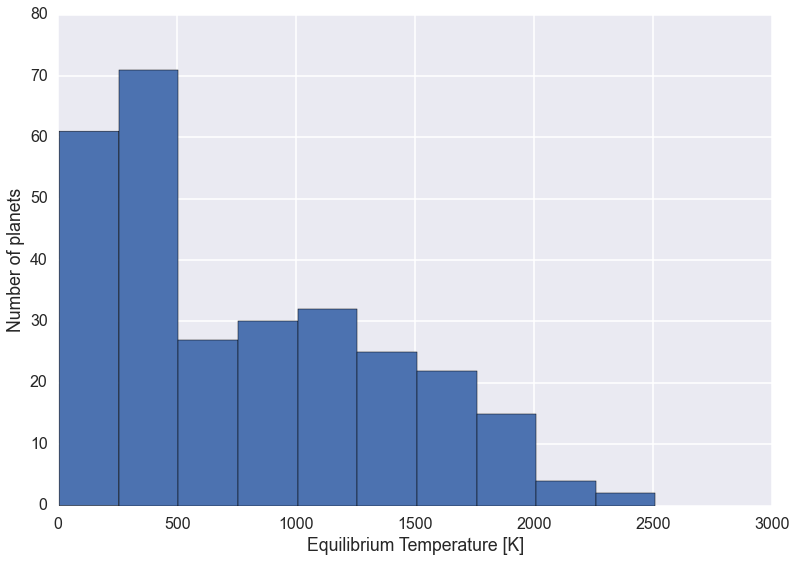

In [18]:
plt.hist(equilibrium_temperatures)
plt.xlabel("Equilibrium Temperature [K]")
plt.ylabel("Number of planets")